<a href="https://colab.research.google.com/github/Michael-Holland-Dev/CS180/blob/main/data_science_labs/data_science_lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 180 Lab 10: Machine Learning with Scikit-Learn

In [2]:
# Dependencies for the lab
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Introduction:
Introduction:
Scikit-learn is a very popular library for machine learning in Python. You can think of it as an add-on to scipy/numpy with a very large number of implementations of common machine learning algorithms.

In general, the scikit-learn API can help you accomplish the following tasks:
* Preprocessing
* Dimensionality Reduction
* Clustering
* Classification
* Regression

Lab Objective:

Learn and become proficient at using different machine learning algorithms in the Scikit-Learn tool set.

For this lab you will need to create a number of plots where each point is given a different color. You can do this using matplotlib. The basic idea is you can create an array of colors and an array of indices

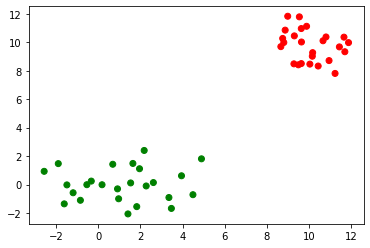

In [3]:
import matplotlib.pyplot as plt
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

n = 25

x1 = np.random.multivariate_normal([10, 10], cov=np.eye(2), size=n)
x1_idx = np.zeros(n, dtype=int)

x2 = np.random.multivariate_normal([0, 0], cov=np.array([[5, 0], [0, 1]]), size=n)
x2_idx = np.ones(n, dtype=int)

X = np.concatenate([x1, x2], axis=0)
X_idx = np.concatenate([x1_idx, x2_idx])

# create the plot and index into the colors array
plt.scatter(X[:, 0], X[:, 1], c=colors[X_idx])

## Exercise 1: Clusters!

In this exercise, you will train three different clustering algorithms on three different datasets. 

### Algorithms:
#### K-means 
* [Overview](https://scikit-learn.org/stable/modules/clustering.html#k-means)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

#### DBScan: 

* [Overview](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

#### GMM: 

* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

After reading the above documentation (You can skim it) attempt to explain to me like I'm five, what these algorithms are doing:
 

Explain how K-Means works?

K means works by using different centroids which are randomly initiated points of data and each point of data is assigned to a centroid. The centroid is then moved to the average of all the points that it was assigned then the centroids move and the points get reassigned to thier nearest centroid. The average is then taken and it repeats until all of the points of data are assigned to its nearest centroid and no changes happened.

Explain how DBScan works?

DBScan works by having a gorup of points together that are close to each other based on a given distance. As the name implies, it then "Scans" around to see if there are any other points within the relative distance of the core of the scan. Any sample that is not a core sample and is a certain distance away from the core is considered an outlier.  

Explain how GMM works?

The Gaussian Mixture Models are a type of machine learning algorithm that is used to classify data into different catagories based on the probability distribution. It assumes all data points are generated from a mix of Gaussian distributions with unknown parameters

#### Datasets:
We will generate three toy datasets using the scikit-learn api, which you can do with the following code:

In [4]:
from sklearn import datasets
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)[0]
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)[0]
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]

This generates three datasets, `noisy_circles`, `noisy_moons`, and `blobs`

Your Task: 
* We want you to train each clustering algorithm on each dataset (you should have a total of 9 plots).
* For each dataset/algorithm, plot the points. Color the points using the cluster the belong to

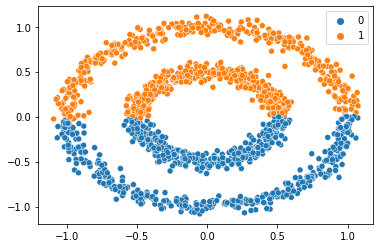

In [5]:
from matplotlib.projections.geo import Circle
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(noisy_circles)
kmeans.labels_

sns.scatterplot(x = noisy_circles[:,0], y= noisy_circles[:,1], hue=kmeans.labels_)






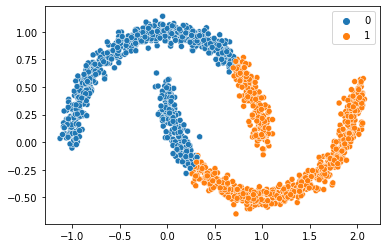

In [6]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(noisy_moons)
kmeans.labels_

sns.scatterplot(x = noisy_moons[:,0], y= noisy_moons[:,1], hue=kmeans.labels_)

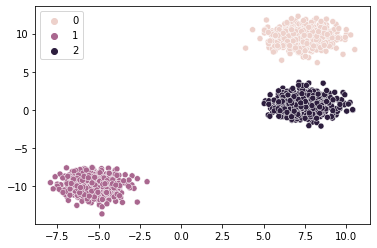

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(blobs)
kmeans.labels_

sns.scatterplot(x = blobs[:,0], y= blobs[:,1], hue=kmeans.labels_)

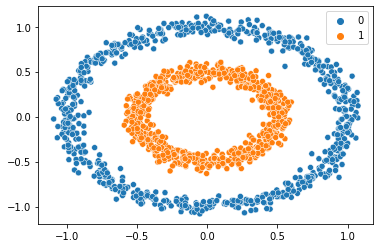

In [8]:
from sklearn import cluster
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.145,min_samples=5)

clusters = dbscan.fit_predict(noisy_circles)

dbscan.labels_

sns.scatterplot(x = noisy_circles[:,0], y= noisy_circles[:,1], hue=dbscan.labels_)






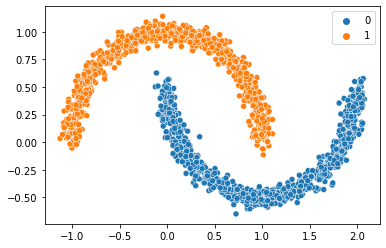

In [9]:
from sklearn import cluster
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.135,min_samples=5)

clusters = dbscan.fit_predict(noisy_moons)

dbscan.labels_

sns.scatterplot(x = noisy_moons[:,0], y= noisy_moons[:,1], hue=dbscan.labels_)

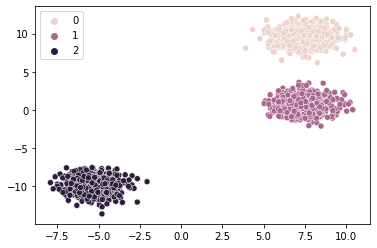

In [10]:
from sklearn import cluster
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2,min_samples=5)

clusters = dbscan.fit_predict(blobs)

dbscan.labels_

sns.scatterplot(x = blobs[:,0], y= blobs[:,1], hue=dbscan.labels_)

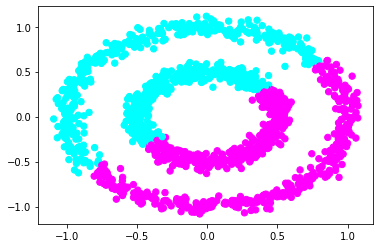

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)

gmm.fit(noisy_circles)

labels = gmm.predict(noisy_circles)

plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=labels, s=40, cmap='cool')



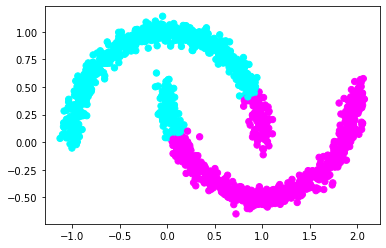

In [12]:
gmm = GaussianMixture(n_components=2)

gmm.fit(noisy_moons)

labels = gmm.predict(noisy_moons)

plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=labels, s=40, cmap='cool')

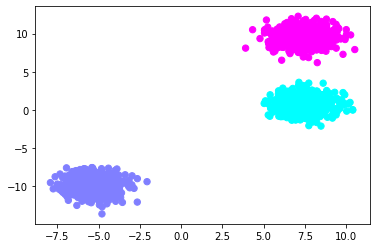

In [13]:
gmm = GaussianMixture(n_components=3)

gmm.fit(blobs)

labels = gmm.predict(blobs)

plt.scatter(blobs[:, 0], blobs[:, 1], c=labels, s=40, cmap='cool')

## Exercise 2: Flower Power Returns


In the previous exercise we looked simple datasets with 2 dimensions (features). In real life, we often have many more variables than. Clustering algorithms can also be applied to higher dimensional data. For this exercise train k-means on the Iris dataset, which has 4 dimensions (features). This is difficult visualize so we will also apply a dimensionality technique to the data to reduce to 2-D strictly to create a plot.

### Dataset
Download the iris dataset and cast to a numpy array

In [14]:
import statsmodels.api as sm
df = sm.datasets.get_rdataset(dataname='iris', package='datasets').data
X = df.iloc[:, :4].values

We know the iris dataset has three classes `['setosa', 'versicolor', 'virginica']`

Your Task: 
* Train K-means on the iris dataset with 3 clusters

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)
# clusters = get predicted clusters indices

Now let’s visualize the clusters by reducing the feature space to 2-D. This will allow us to create a plot. We will use T-distributed Stochastic Neighbor Embedding [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Your Task:
* Create a plot using X_reduced, where each point is colored according to its cluster id.

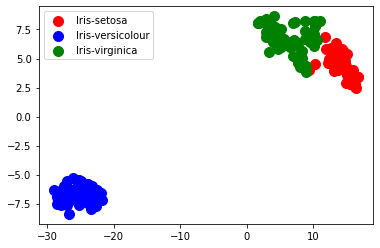

In [17]:
plt.scatter(X_reduced[y_kmeans   == 0, 0], X_reduced[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X_reduced[y_kmeans   == 1, 0], X_reduced[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_reduced[y_kmeans   == 2, 0], X_reduced[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()
plt.show()


Comment on your observations. Were we successfully able to group samples together without labels?

I believe that I was successfully able to group samples together without labels

## Exercise 3: Split the Data

Use the train_test_split() function in sklearn (sklearn.model_selection.train_test_split ) to split the iris data set. Report the number of samples in both the train and test set.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_kmeans,test_size=0.25)

print("X_train sample size:", X_train.size)
print("y_train sample size:", y_train.size)

print("X_test sample size:", X_test.size)
print("y_test sample size:", y_test.size)
#Split the dataset here

X_train sample size: 448
y_train sample size: 112
X_test sample size: 152
y_test sample size: 38


What is the number of samples in the train set?

The number of Samples in the X_train set is 448 and the number of samples in the y_train set is 112.

What is the number of samples in the test set?

The number of Samples in the X_test set is 152 and the number of samples in the y_test set is 38.

## Exercise 4: K Nearest Neighbors

Your Task: 
* Train a K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier ) on the iris data.

* Train your KNN when the n_neighbors parameter is 5. Report your train accuracy and test accuracy

* Perform a grid search over the parameter n_neighbors over the range 1-20:

* For each value of n_neighbors, fit a KNN and record your train and test accuracy

* Create a plot showing the test/train accuracy over the n_neighbors



In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

knn.score(X_test, y_test)







1.0

What is your train accuracy and test accuracy for when the n_neighbors parameter is 5

It appears to be 1 but I do not believe I did it correctly

Discuss what you learn. How does train and test accuracy behave as you change the number of neighbors?

It seems to get Worse if I play around with the number of neighbors